## Network building

This notebook provides the steps to build a network starting from a list of genes, and using the default functionalities of Omniflow.

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op

/home/eirini/anaconda3/envs/neko_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CPU times: user 1.86 s, sys: 436 ms, total: 2.3 s
Wall time: 2.43 s


### 1. Define the list of genes of interest

In [2]:
genes = ["SRC", "NOTCH1", "FAK", "CDH1", "CDH2", "VIM", "MAP4K4", "LATS1", "LATS2", "PTK2B"]

### 2. Create a network using as input the gene set. 

NB! If no resource is specified, the default used resource by the package is omnipath.all_interactions()

#### 2A. Import genes as network nodes

In [3]:
new_net1 = Network(genes)

Loading deafault omnipath all interactions


In [4]:
#Print node dataframe
new_net1.nodes

,Genesymbol,Uniprot,Type
0,SRC,P12931,NaN
1,NOTCH1,P46531,NaN
2,PTK2,Q05397,NaN
3,CDH1,P12830,NaN
4,CDH2,P19022,NaN
5,VIM,P08670,NaN
6,MAP4K4,O95819,NaN
7,LATS1,O95835,NaN
8,LATS2,Q9NRM7,NaN
9,PTK2B,Q14289,NaN


#### 2B. Explore if the nodes are connected without introducing new intermidiate nodes

In [5]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=True)

P12931 Q05397
P12931 P19022
P12931 Q14289
Q14289 Q05397
CPU times: user 889 ms, sys: 3.97 ms, total: 893 ms
Wall time: 892 ms


#### 2C. Visualize the network with the following command. 

The network picture is also exported in the working repository, in pdf format.

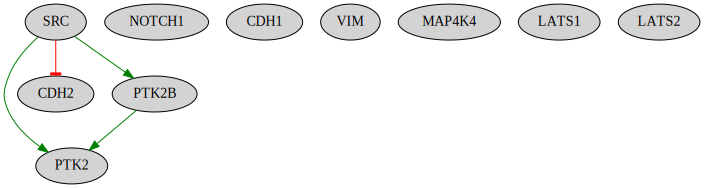

In [7]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render(output_file="new_network")

#### 2D. Connect disconnected nodes by importing intermediate nodes.

The parameter _*maxlen*_ is used to verify that in the network all the nodes have a distance < than maxlen. 

The parameter _*only_signed*_ forces the algorithm to look for just signed interactions. 

The parameter _*consensus*_ retrieves those interactions with a sign consensus between the references. 

The parameter _*connect_node_when_first_introduced*_, changes the base algorithm, making it look for possible connection between all the disconnected node in the network when a new bridge-gene is introduced in the network.

In [8]:
%%time
new_net1.complete_connection(mode="ALL", maxlen=6, k_mean="tight", only_signed=True, connect_node_when_first_introduced=True, consensus=True)

looking for paths in the network with length:  0  for node  SRC  and  NOTCH1
looking for paths in the network with length:  1  for node  SRC  and  NOTCH1
looking for paths in the network with length:  2  for node  SRC  and  NOTCH1
looking for paths in the network with length:  3  for node  SRC  and  NOTCH1
looking for paths in the network with length:  4  for node  SRC  and  NOTCH1
looking for paths in the network with length:  5  for node  SRC  and  NOTCH1
looking for paths in the network with length:  6  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  0  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  1  for node  SRC  and  NOTCH1
i_search =  3
Looking for paths with length:  2  for node  SRC  and  NOTCH1
[['SRC', 'CTNNB1', 'NOTCH1'], ['SRC', 'DAB1', 'NOTCH1']]
P12931 P35222
P35222 P46531
P12931 O75553
O75553 P46531
P12931 Q05397
P12931 P19022
P12931 Q14289
P12931 P35222
P12931 O75553
P35222 P46531
O75553 P46531
Q14289 Q05397
P12830 P

#### 2E. Visualize final network

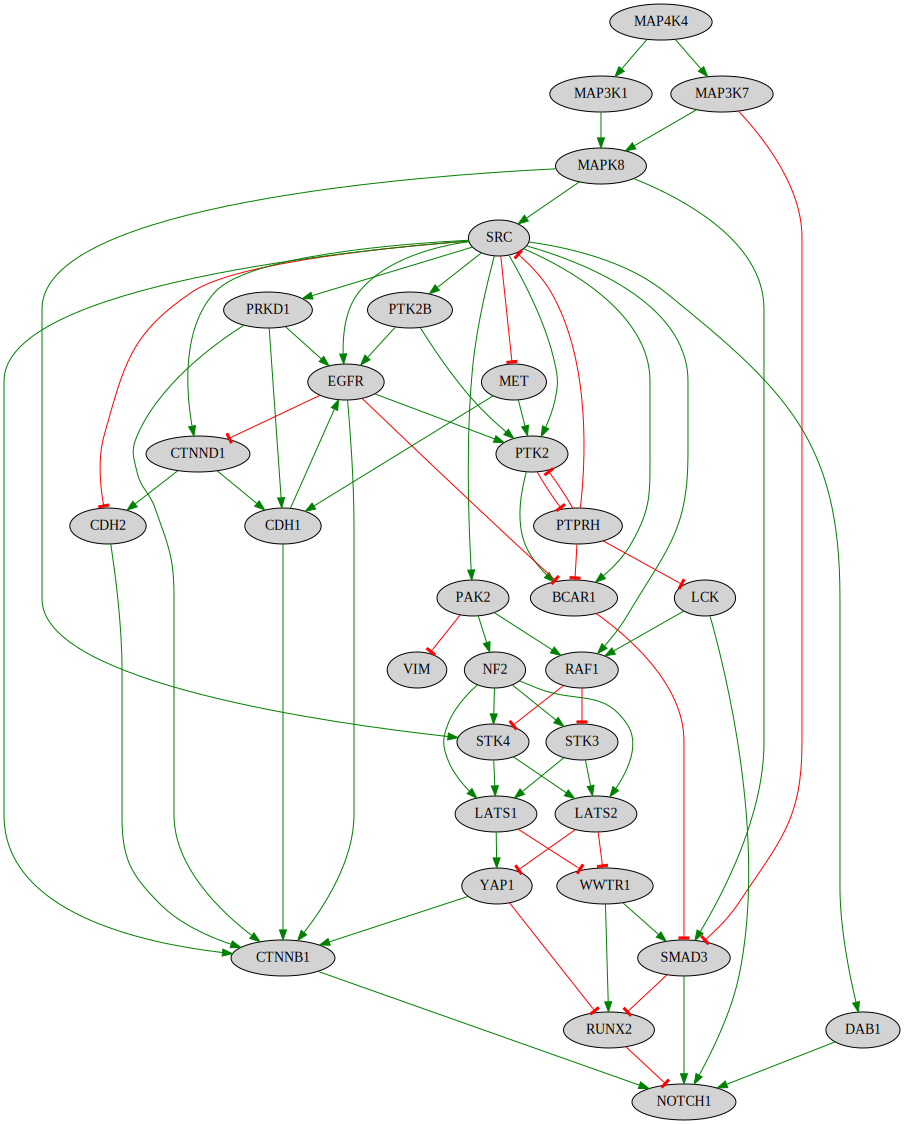

In [9]:
#Visualize network
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render(output_file='network2')

In [ ]:
#Visualize a specific nodes and 
visualizer1 = NetworkVisualizer(new_net1, predefined_node = "SRC",color_by='effect')
visualizer1.render(output_file='network2')

In [15]:
#We can access to the edges of the network
new_net1.edges

,source,target,Type,Effect,References
6821,P12931,Q05397,None,stimulation,Adhesome:10085298;Adhesome:10592173;Adhesome:1...
32968,P12931,P19022,None,inhibition,ACSN:15782139;ACSN:16371504;ACSN:16492141;ACSN...
5154,P12931,Q14289,None,stimulation,Adhesome:10329689;Adhesome:10521452;Adhesome:1...
44795,Q14289,Q05397,None,stimulation,Adhesome:16760434;HPRD:16760434;KEA:12960434;K...
11582,P12931,P35222,None,stimulation,ACSN:10593980;ACSN:12123611;ACSN:15782139;ACSN...
...,...,...,...,...,...
67482,P00533,Q05397,None,stimulation,ACSN:10545505;ACSN:16919435;ACSN:17496910;ACSN...
7631,Q14289,P00533,None,stimulation,CA1:11274221;HPRD:10777553;InnateDB:14963038;S...
73973,P00533,P35222,None,stimulation,ACSN:12040186;ACSN:14585353;ACSN:17496910;ACSN...
2907,Q15139,P00533,None,stimulation,CancerCellMap:10523301;CancerCellMap:2984676;C...
